In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("train_ctrUa4K.csv")
test_data=pd.read_csv("test_lAUu6dG.csv")

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Preprocessing-numericals
1)missing values
2)outlier transformation
3)scaling
Proprocessing-category
1)missing values
2)onehot trans
3)ordinal trans

feature generation



In [5]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,FunctionTransformer ,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer

In [8]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
def preprocessing(data):

    def feature_generation(data): #create a new feature
        data["combined_income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
        data['EMI'] = data['LoanAmount'] * 1000 / data['Loan_Amount_Term']
        data["Credit_History"]=data["Credit_History"].astype("str")
        return data
    def pipeline(data):#compelete-preprocessing
        data=feature_generation(data)
        numerical=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","combined_income","EMI"]
        onehot=["Gender","Married","Education","Self_Employed","Credit_History"]
        ordinal=["Dependents","Property_Area"]
        dependent_order=["0","1","2","3+","missing"]
        Property_area_order=["Rural","Semiurban","Urban"]
        # imputing missing values of numerical variables, because of outlier using log , converting into same units
        numerical_col = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='median')), ## because of outliers imputing median
        ("Log_transformer",FunctionTransformer(np.log1p, validate=False)),
        ("scale",MinMaxScaler())
        ])
        #coverting category variables into one-hot and imputing missing values
        one_hot_col = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
        ("one_hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False,drop='first')) ## because we have only 2 outcomes eg:gender male and female 
        
        ])
        #coverting ordinal variables into ordinal and imputing missing values
        ordinal_col = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
        ("ordinal", OrdinalEncoder(categories=[dependent_order, Property_area_order])),
        ("scale",MinMaxScaler())
        ])
        
        pre_processor = (ColumnTransformer(transformers=[
        ("numerical", numerical_col, numerical),
        ("one-hot", one_hot_col, onehot),
        ("ordinal", ordinal_col, ordinal)
        ],verbose_feature_names_out=False).set_output(transform='pandas'))

        
        X_transformed = pre_processor.fit_transform(data)
        return X_transformed
        
    data=pipeline(data)
    return data
    

    
    
    
   

In [10]:
train_data['Loan_Status'] = train_data['Loan_Status'].apply(lambda data: 1 if data == 'Y' else 0)

train_data['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [11]:
X=train_data.drop('Loan_Status',axis=1)
y=train_data['Loan_Status']

In [12]:
X_train_scaled=preprocessing(X)

In [13]:

X_train_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,combined_income,EMI,Gender_Male,Gender_missing,Married_Yes,Married_missing,Education_Not Graduate,Self_Employed_Yes,Self_Employed_missing,Credit_History_1.0,Credit_History_nan,Dependents,Property_Area
0,0.581854,0.000000,0.601711,0.920522,0.347520,0.450310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1.0
1,0.543052,0.688057,0.601711,0.920522,0.357583,0.445730,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.25,0.0
2,0.475649,0.000000,0.447563,0.920522,0.181795,0.333422,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,1.0
3,0.451844,0.730059,0.586647,0.920522,0.305642,0.434776,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00,1.0
4,0.585909,0.000000,0.624304,0.920522,0.353847,0.462153,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.470256,0.000000,0.464498,0.920522,0.173381,0.345788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.0
610,0.525569,0.000000,0.332003,0.729329,0.259691,0.366008,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.75,0.0
611,0.633101,0.515610,0.761131,0.920522,0.434759,0.561482,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.25,1.0
612,0.623159,0.000000,0.690332,0.920522,0.411972,0.510110,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.50,1.0


In [14]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, concatenate
from scipy.stats import uniform, randint
from sklearn.utils import class_weight

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y,stratify=y, test_size=0.25, random_state = 10)

In [16]:
X_train.shape,X_test.shape

((460, 17), (154, 17))

In [17]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [18]:
input_neurons = X_train.shape[1]
output_neurons = 1

In [19]:
number_of_hidden_layers = 5
neuron_hidden_layer_1 = 50
neuron_hidden_layer_2 = 50
neuron_hidden_layer_3 =50
neuron_hidden_layer_4 =50
neuron_hidden_layer_5 =50

In [20]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_5, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,151 (43.56 KB)

 Trainable params: 11,151 (43.56 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test),batch_size=128,epochs=20)#class_weight

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6839 - loss: 0.6514 - val_accuracy: 0.6883 - val_loss: 0.6253
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6706 - loss: 0.6254 - val_accuracy: 0.6883 - val_loss: 0.6073
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6823 - loss: 0.6040 - val_accuracy: 0.6883 - val_loss: 0.6018
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6816 - loss: 0.6012 - val_accuracy: 0.6883 - val_loss: 0.5933
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7073 - loss: 0.5633 - val_accuracy: 0.6883 - val_loss: 0.5836
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6678 - loss: 0.5877 - val_accuracy: 0.6883 - val_loss: 0.5792
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6909 - loss: 0.5531 - val_accuracy: 0.6883 - val_loss: 0.5704
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6896 - loss: 0.5393 - val_accuracy: 0.6883 - val_loss: 0.5667

In [24]:
from sklearn.metrics import accuracy_score
# Use model.predict to get probabilities
predictions = model.predict(X_test)

# Convert probabilities to class labels (0 or 1) using a threshold of 0.5
predictions = [1 if pred > 0.65 else 0 for pred in predictions]
predictions


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1]

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.46      0.49        48
           1       0.77      0.82      0.79       106

    accuracy                           0.71       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.70      0.71      0.70       154



In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions, labels=[0, 1])
print(cm)


[[22 26]
 [19 87]]


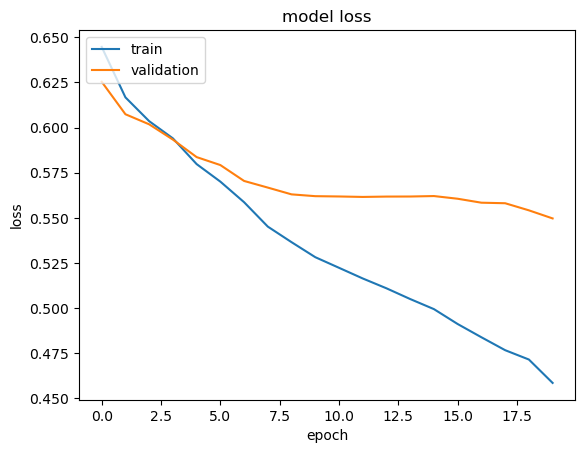

In [27]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

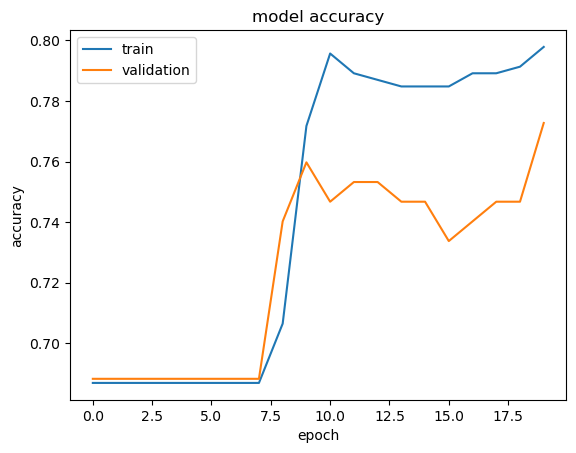

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()